In [1]:
# My own convnets model using Tensor Flow
from convnets import Model

In [2]:
# Reading the inputs!
def reading_file_name(base_dir):
    from os import listdir
    from os.path import isfile, join
    onlyfiles = [f for f in listdir(base_dir) if isfile(join(base_dir, f))]
    return onlyfiles

test_files_name = reading_file_name('Large Files/test.rotfaces/test/')
train_files_name = reading_file_name('Large Files/train.rotfaces/train/')

In [3]:
from imageio import imread
from os.path import join

track = len(train_files_name)
count = 0

train = dict()
for f in train_files_name:
    train[f] = (imread(join('Large Files/train.rotfaces/train/', f)))
    count += 1
    print('{0}%'.format(round((count/track)*100), 2), end='\r')

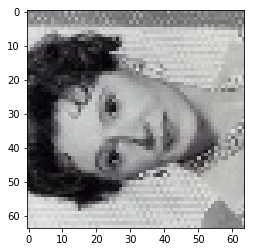

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(train['0-10049200_1891-09-16_1958.jpg'])

In [5]:
train

{'60-220160_1977-08-17_2013.jpg': Array([[[117, 124,  46],
         [115, 122,  45],
         [102, 108,  34],
         ...,
         [137, 148,  69],
         [134, 146,  64],
         [131, 143,  61]],
 
        [[112, 121,  40],
         [111, 119,  42],
         [ 91, 102,  26],
         ...,
         [134, 145,  66],
         [130, 142,  60],
         [131, 143,  61]],
 
        [[110, 123,  41],
         [106, 119,  39],
         [105, 117,  41],
         ...,
         [136, 147,  68],
         [131, 143,  61],
         [125, 137,  55]],
 
        ...,
 
        [[227, 234, 250],
         [220, 228, 249],
         [221, 231, 255],
         ...,
         [ 63,  63,  97],
         [ 31,  35,  46],
         [191, 196, 189]],
 
        [[214, 221, 239],
         [223, 229, 253],
         [220, 227, 255],
         ...,
         [ 55,  57,  96],
         [ 62,  65,  80],
         [197, 204, 196]],
 
        [[212, 216, 245],
         [208, 213, 242],
         [219, 227, 248],
         

In [6]:
from pandas import read_csv
labels = read_csv('Large Files/train.rotfaces/train.truth.csv')

labels

,fn,label
0,0-10049200_1891-09-16_1958.jpg,rotated_left
1,0-10110600_1985-09-17_2012.jpg,rotated_left
2,0-10126400_1964-07-07_2010.jpg,upright
3,0-1013900_1917-10-15_1960.jpg,rotated_right
4,0-10166400_1960-03-12_2008.jpg,upside_down
5,0-102100_1970-10-09_2008.jpg,rotated_left
6,0-1024100_1982-06-07_2011.jpg,rotated_left
7,0-10292500_1984-03-26_2009.jpg,rotated_left
8,0-1035700_1945-11-27_2013.jpg,upside_down
9,0-10416800_1907-01-08_1967.jpg,upright


In [7]:
X = []

for item in labels.fn:
    X.append(train[item])

In [8]:
Ya = []

for item in labels.label:
    Ya.append(item)

In [9]:
# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()
# le.fit(Ya)
# print(le.classes_)

# Y = le.transform(Ya)
# print(Y)

['rotated_left' 'rotated_right' 'upright' 'upside_down']
[0 0 2 ... 0 0 1]


In [37]:
from tensorflow.keras.utils import to_categorical

Y = to_categorical(Y, num_classes=4)
Y

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]], dtype=float32)

In [38]:
from sklearn.model_selection import train_test_split
Xtr, Xte, Ytr, Yte = train_test_split(X, Y)

In [40]:
# le.inverse_transform([Ytr[1]])
Ytr[1]

array([1., 0., 0., 0.], dtype=float32)

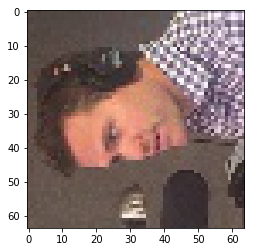

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(Xtr[1])

In [42]:
from numpy import array

Xtr = array(Xtr).astype('float16')
Xte = array(Xte).astype('float16')
Ytr = array(Ytr).astype('float16')
Yte = array(Yte).astype('float16')

print('{0}, {1}, {2}, {3}'.format(Xtr.shape, Xte.shape, Ytr.shape, Yte.shape))

(36672, 64, 64, 3), (12224, 64, 64, 3), (36672, 4), (12224, 4)


In [43]:
my_model = Model({
    'Xtr': Xtr, 'Xte': Xte, 'Ytr': Ytr, 'Yte':Yte
}, frame=(64,64))

Model Created Successfully...


In [44]:
my_model.starter()

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpj3q1k7n2', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f74e06d6c18>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
DONE CLASSIFIER!


In [45]:
my_model.train(batch_size=128)
print(my_model.evaluate())
print(my_model.predict(Xte[0]))

TRAINNING MODEL...
INFO:tensorflow:Calling model_fn.


ValueError: Can not squeeze dim[1], expected a dimension of 1, got 4 for 'sparse_softmax_cross_entropy_loss/remove_squeezable_dimensions/Squeeze' (op: 'Squeeze') with input shapes: [128,4].

In [46]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

In [47]:
batch_size = 32
num_classes = 4
epochs = 100
data_augmentation = False
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

In [48]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=Xtr.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [49]:
# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

Xtr /= 255
Xte /= 255

In [50]:
if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(Xtr, Ytr,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(Xte, Yte),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

Not using data augmentation.
Instructions for updating:
Use tf.cast instead.
Train on 36672 samples, validate on 12224 samples
Epoch 1/100
 3744/36672 [==>...........................] - ETA: 21:45 - loss: 1.2675 - acc: 0.4225

KeyboardInterrupt: 

In [ ]:
Yte.shape

In [ ]:
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])